1 - Using NLTK "word_tokenize" function, tokenize the given sentences.

In [112]:
#Text Preprocessing
import pandas as pd 
import numpy as np
import re
import sklearn 
import nltk 
# nltk.download('all')
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *  
from nltk.stem.wordnet import WordNetLemmatizer
import kneed as kne
import scipy.cluster.hierarchy as sch
import seaborn as sns
from IPython.display import Image
from gensim.models import Word2Vec
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer()

sentences = ["In the past John liked only sport but now he likes sport and politics", 
             "Sam only liked politics but now he is fan of both music and politics", 
             "Sara likes both books and politics but in the past she only read books", 
             "Robert loved both books and nature but now he only reads books ", 
             "Linda liked books and sport but she only likes sport now", 
             "Alison used to loved nature but currently she likes both nature and sport"] 


for sentence in sentences:
    sentence = sentence.lower()
    words = word_tokenize(sentence)
    print(words)



['in', 'the', 'past', 'john', 'liked', 'only', 'sport', 'but', 'now', 'he', 'likes', 'sport', 'and', 'politics']
['sam', 'only', 'liked', 'politics', 'but', 'now', 'he', 'is', 'fan', 'of', 'both', 'music', 'and', 'politics']
['sara', 'likes', 'both', 'books', 'and', 'politics', 'but', 'in', 'the', 'past', 'she', 'only', 'read', 'books']
['robert', 'loved', 'both', 'books', 'and', 'nature', 'but', 'now', 'he', 'only', 'reads', 'books']
['linda', 'liked', 'books', 'and', 'sport', 'but', 'she', 'only', 'likes', 'sport', 'now']
['alison', 'used', 'to', 'loved', 'nature', 'but', 'currently', 'she', 'likes', 'both', 'nature', 'and', 'sport']


2 - Using NLTK PorterStemmer, perform the stemming for the tokens of the sentences.

In [113]:
for sentence in sentences:
    #Converting to Lowercase 
    sentence = sentence.lower()

    #Tokenization 
    words = word_tokenize(sentence)

    #Lemmatization
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    print(words)

['past', 'john', 'like', 'sport', 'like', 'sport', 'polit']
['sam', 'like', 'polit', 'fan', 'music', 'polit']
['sara', 'like', 'book', 'polit', 'past', 'read', 'book']
['robert', 'love', 'book', 'natur', 'read', 'book']
['linda', 'like', 'book', 'sport', 'like', 'sport']
['alison', 'use', 'love', 'natur', 'current', 'like', 'natur', 'sport']


3 - Using NLTK WordNetLemmatizer, perform the lemmatization for the stemmed tokens 

In [114]:
corpus = []

for sentence in sentences:
    #Converting to Lowercase 
    sentence = sentence.lower()

    #Tokenization 
    words = word_tokenize(sentence)
    
    #Lemmatization
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    sentence = ' '.join(words)
    print(sentence)
    corpus.append(sentence)


past john like sport like sport polit
sam like polit fan music polit
sara like book polit past read book
robert love book natur read book
linda like book sport like sport
alison use love natur current like natur sport


4 - Using sklearn K-means clustering technique, cluster the given sentences. Find the 
feature vectors for the input of a K-means algorithm using the below techniques. Also, 
find an appropriate K-value using a KneeLocator method from the python kneed library.
a- TF-IDF
b- TF
c- BOW
d- Word2Vec

TF-IDF

list of features
-------------------------------------------------
['alison', 'book', 'like', 'love', 'natur', 'past', 'polit', 'read', 'sara', 'sport']
tfid matrix
     alison      book      like      love     natur      past     polit  \
0  0.000000  0.000000  0.504883  0.000000  0.000000  0.404050  0.341127   
1  0.000000  0.000000  0.347018  0.000000  0.000000  0.000000  0.937858   
2  0.000000  0.618987  0.229032  0.000000  0.000000  0.366582  0.309494   
3  0.000000  0.698055  0.000000  0.413408  0.413408  0.000000  0.000000   
4  0.000000  0.372923  0.551943  0.000000  0.000000  0.000000  0.000000   
5  0.442639  0.000000  0.226776  0.362970  0.725940  0.000000  0.000000   

       read      sara     sport  
0  0.000000  0.000000  0.682253  
1  0.000000  0.000000  0.000000  
2  0.366582  0.447043  0.000000  
3  0.413408  0.000000  0.000000  
4  0.000000  0.000000  0.745847  
5  0.000000  0.000000  0.306444  


C:\Users\mahad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


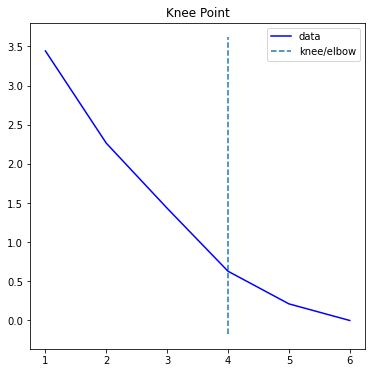

In [115]:
tfidf = TfidfVectorizer(norm='l2', max_features=10)
tfidf_fit = tfidf.fit_transform(corpus)

print("list of features")
print("-------------------------------------------------")
print(tfidf.get_feature_names())

print("tfid matrix")
tfidf_vector = pd.DataFrame(tfidf_fit.toarray(), columns=tfidf.get_feature_names())
print(tfidf_vector)

K = range(1,7)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(tfidf_vector)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'clusters': K, 'wss': wss})

kneedle = kne.KneeLocator(K, wss, S=1.0, curve="convex", direction="decreasing")
kneedle.plot_knee()

TF

list of features
-------------------------------------------------
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']
tf matrix


C:\Users\mahad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


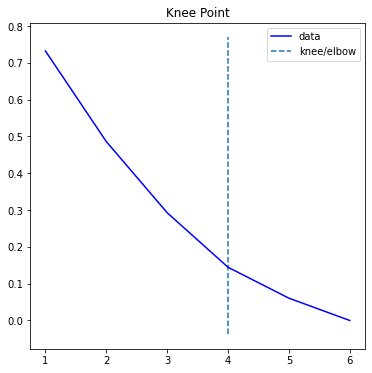

In [116]:
v = TfidfVectorizer(use_idf=False, norm='l1')
tf = v.fit_transform(corpus)
print("list of features")
print("-------------------------------------------------")
print(v.get_feature_names())

print("tf matrix")
dp = pd.DataFrame(tf.toarray(), columns=v.get_feature_names())

K = range(1,7)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(dp)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'clusters': K, 'wss': wss})

kneedle = kne.KneeLocator(K, wss, S=1.0, curve="convex", direction="decreasing")
kneedle.plot_knee()

BOW

list of features
-------------------------------------------------
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']


C:\Users\mahad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


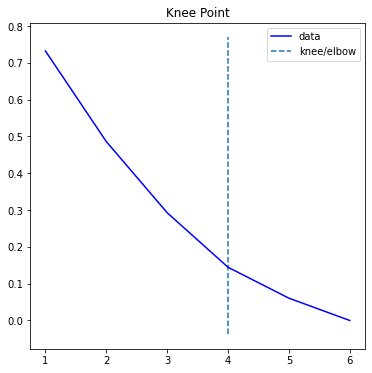

In [117]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
print("list of features")
print("-------------------------------------------------")
print(vectorizer.get_feature_names())
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

K = range(1,7)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(dp)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'clusters': K, 'wss': wss})

kneedle = kne.KneeLocator(K, wss, S=1.0, curve="convex", direction="decreasing")
kneedle.plot_knee()

Word2Vec

C:\Users\mahad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


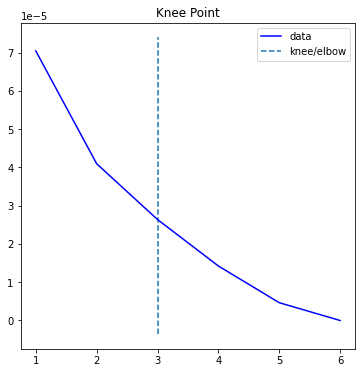

In [118]:
model = Word2Vec(corpus, min_count = 1)
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

# Source: https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

vectorized_docs = vectorize(corpus, model)
len(vectorized_docs), len(vectorized_docs[0])

dp = pd.DataFrame(vectorized_docs)

K = range(1,7)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(dp)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'clusters': K, 'wss': wss})

kneedle = kne.KneeLocator(K, wss, S=1.0, curve="convex", direction="decreasing")
kneedle.plot_knee()

5 - Visualize the clusters using the word clouds.

TF-IDF

In [139]:
kmeans = cluster.KMeans(n_clusters=4, init='k-means++')
kmeans = kmeans.fit(tfidf_vector)
tfidf_vector['clusters'] = kmeans.labels_
cluster_one = tfidf_vector[tfidf_vector['clusters'] == '0']
cluster_one


,alison,book,like,love,natur,past,polit,read,sara,sport,clusters


In [136]:
tfidf_vector

,alison,book,like,love,natur,past,polit,read,sara,sport,clusters
0,0.000000,0.000000,0.504883,0.000000,0.000000,0.404050,0.341127,0.000000,0.000000,0.682253,0
1,0.000000,0.000000,0.347018,0.000000,0.000000,0.000000,0.937858,0.000000,0.000000,0.000000,2
2,0.000000,0.618987,0.229032,0.000000,0.000000,0.366582,0.309494,0.366582,0.447043,0.000000,3
3,0.000000,0.698055,0.000000,0.413408,0.413408,0.000000,0.000000,0.413408,0.000000,0.000000,3
4,0.000000,0.372923,0.551943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.745847,0
5,0.442639,0.000000,0.226776,0.362970,0.725940,0.000000,0.000000,0.000000,0.000000,0.306444,1


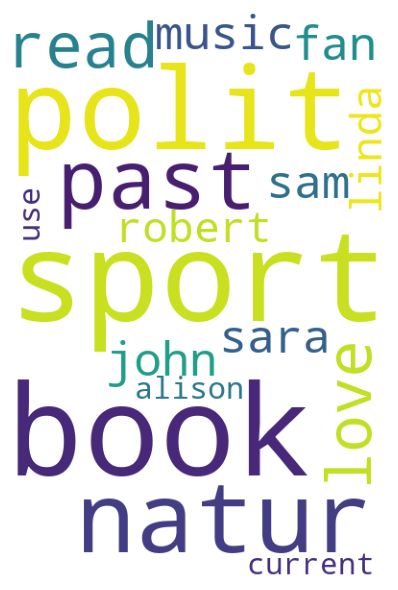

In [120]:
wc_input = corpus[0]
for sentence in corpus[1:]:
    wc_input += ' {}'.format(sentence)

wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               height=600,
               width=400)
wc.generate(wc_input)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()